In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from Callbacks import RealTimePlotCallback
from dataset_module import dataset_creation

In [18]:
while os.getcwd() != "C:\\My Projects\\Opdracht-schilders":
    os.chdir('..')

os.chdir("7. Finale training & evaluatie")
os.getcwd()

'C:\\My Projects\\Opdracht-schilders\\7. Finale training & evaluatie'

In [7]:
classes = os.listdir("../../datasets/paintings")

In [23]:
(data, labels) = dataset_creation.create_data_with_labels("../datasets/paintings")
# nu paintings van volledige dataset ophalen

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 5) # random_state om telkens dezelfde uitkomt te krijgen


..\datasets\paintings\Picasso\bust-of-woman-with-yellow-ribbon-jacqueline-1962.jpg --> FAILED
..\datasets\paintings\Picasso\café-in-royan-1940.jpg!Portrait.jpg --> FAILED
..\datasets\paintings\Picasso\café-royan-1940 (2).jpg --> FAILED
..\datasets\paintings\Picasso\café-royan-1940.jpg --> FAILED
..\datasets\paintings\Picasso\man-and-woman-in-café-1903.jpg --> FAILED
..\datasets\paintings\Picasso\man-and-woman-in-café-study-1903.jpg!Portrait.jpg --> FAILED
..\datasets\paintings\Picasso\man-and-woman-with-child-in-café-1903.jpg!Portrait.jpg --> FAILED
..\datasets\paintings\Picasso\pablo-picasso-and-sebastìa-junyer-vidal-arrives-to-paris-1901-1.jpg --> FAILED
..\datasets\paintings\Picasso\pablo-picasso-and-sebastìa-junyer-vidal-arrives-to-paris-1901.jpg!Portrait.jpg --> FAILED
..\datasets\paintings\Picasso\pierrot-and-harlequin-on-the-terrace-of-café-1920.jpg --> FAILED
..\datasets\paintings\Picasso\portrait-of-bibi-la-purée-1901.jpg --> FAILED
..\datasets\paintings\Picasso\portrait-of-lé

# Finale training gekozen model

We zagen in '5.3 Optimizer & learning rate' (waar we dit model ook kozen) dat het model na 30 epochs niet echt meer verbeterd. Er treed niet meteen overfitting op, maar de accuracy op de validatie set verbeterde niet meer. Dus zal ik dit finale model trainen voor 30 epochs.

In [24]:
conv_base = keras.applications.ResNet50(
    weights="imagenet",
    include_top=False)

# alle lagen behalve de laatste 4 freezen
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

input_layer = keras.Input(shape=(180, 180, 3))
x = conv_base(input_layer)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(input_layer, outputs)


model.compile(loss="sparse_categorical_crossentropy",
     optimizer=keras.optimizers.RMSprop(learning_rate=1e-6),
     metrics=["accuracy"])

In [25]:
history = model.fit(
         X_train, y_train,
         epochs=30
        )

Epoch 1/30
89/89 [==============================] - 11s 91ms/step - loss: 3.1853 - accuracy: 0.4267
Epoch 2/30
89/89 [==============================] - 8s 86ms/step - loss: 2.2506 - accuracy: 0.5507
Epoch 3/30
89/89 [==============================] - 8s 86ms/step - loss: 1.7839 - accuracy: 0.6256
Epoch 4/30
89/89 [==============================] - 8s 86ms/step - loss: 1.4058 - accuracy: 0.6856
Epoch 5/30
89/89 [==============================] - 8s 86ms/step - loss: 1.1809 - accuracy: 0.7280
Epoch 6/30
89/89 [==============================] - 8s 86ms/step - loss: 1.0310 - accuracy: 0.7556
Epoch 7/30
89/89 [==============================] - 8s 88ms/step - loss: 0.8834 - accuracy: 0.7708
Epoch 8/30
89/89 [==============================] - 8s 89ms/step - loss: 0.8554 - accuracy: 0.7983
Epoch 9/30
89/89 [==============================] - 8s 89ms/step - loss: 0.7554 - accuracy: 0.8057
Epoch 10/30
89/89 [==============================] - 8s 89ms/step - loss: 0.6679 - accuracy: 0.8252
Epoch 11

In [26]:
keras.models.save_model(model, filepath='final_model.keras')

Finale evaluatie van training op volledige testset (deze keer zonder duplicaten)

In [27]:
model = keras.models.load_model("final_model.keras")
model.evaluate(X_test, y_test)

23/23 [==============================] - 3s 92ms/step - loss: 0.4325 - accuracy: 0.9040


[0.43246036767959595, 0.903954803943634]

23/23 [==============================] - 3s 77ms/step


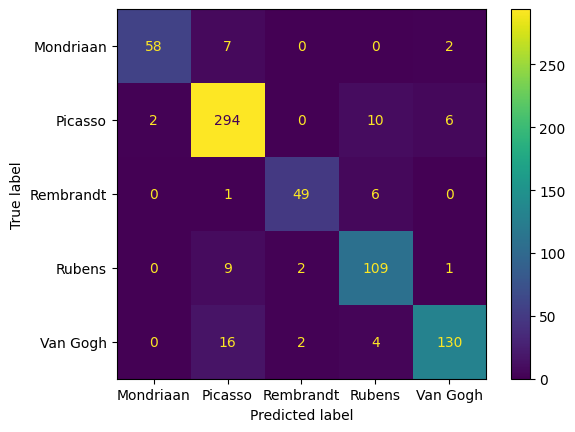

In [32]:
cm = confusion_matrix(y_true=y_test, y_pred=np.argmax(model.predict(X_test), axis=-1))
ConfusionMatrixDisplay(cm, display_labels=classes).plot()
plt.show()